# Media Company Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading & Understanding Data

In [7]:
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [8]:
del media['Unnamed: 7']

In [9]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [10]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,5/15/2017,313945,1808684,2226788,1398052759,1,0
76,5/16/2017,185689,1814227,2199844,1311961223,1,0
77,5/17/2017,142260,1755803,2225752,1248266254,1,0
78,5/18/2017,135871,1749654,2302789,1284859759,1,0
79,5/19/2017,108961,1746735,2279036,1246026846,1,0


# Data Inspection

In [12]:
media.shape

(80, 7)

In [13]:
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [14]:
media['Date'] = pd.to_datetime(media['Date'])

In [15]:
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [16]:
media[['Views_show', 'Visitors',
       'Views_platform', 'Ad_impression']].describe()

,Views_show,Visitors,Views_platform,Ad_impression
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09


# Missing Value and Outlier Check

In [18]:
media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

<Axes: ylabel='Views_show'>

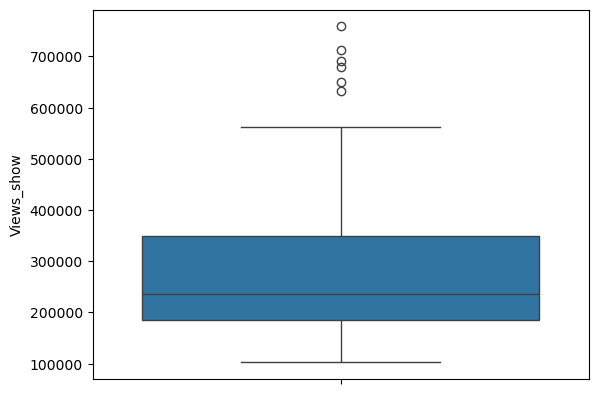

In [19]:
sns.boxplot(media['Views_show'])

<Axes: ylabel='Visitors'>

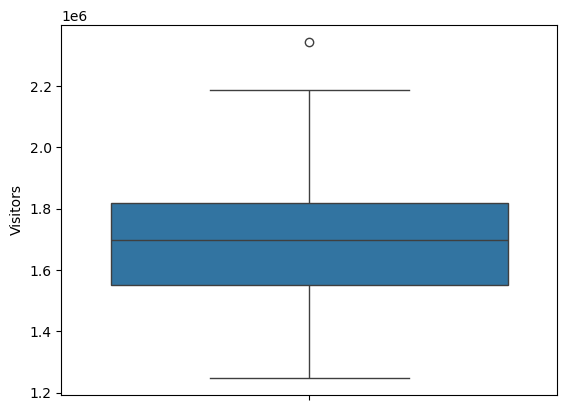

In [20]:
sns.boxplot(media['Visitors'])

<Axes: ylabel='Views_platform'>

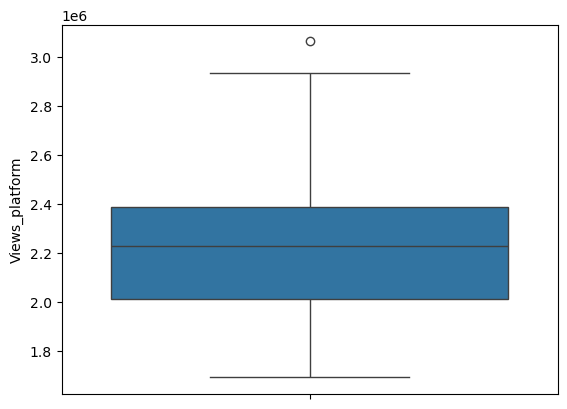

In [21]:
sns.boxplot(media['Views_platform'])

<Axes: ylabel='Ad_impression'>

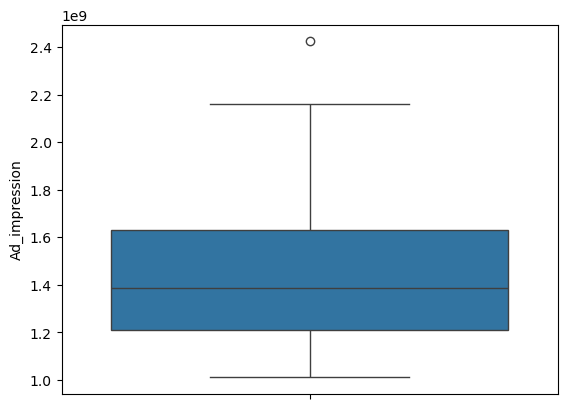

In [22]:
sns.boxplot(media['Ad_impression'])

In [23]:
# creted a new feature!!
media['Day_of_week'] = media['Date'].dt.dayofweek

In [24]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


# Exploratory Data Analysis

<Axes: xlabel='Date'>

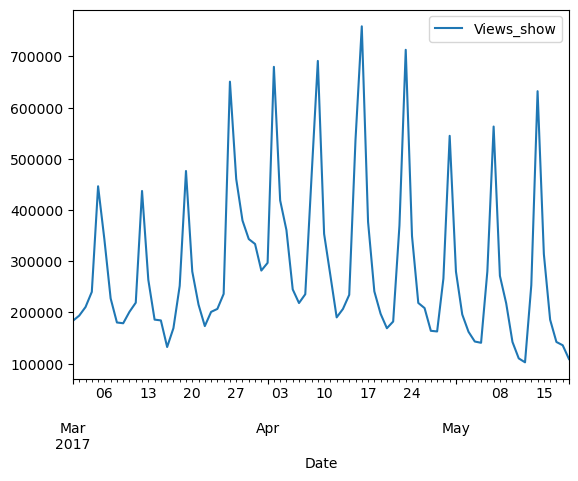

In [26]:
# Date v/s Views_show
media.plot.line(x='Date',y='Views_show')

In [27]:
# Day_of_week v/s view_shows

<Axes: xlabel='Day_of_week', ylabel='Views_show'>

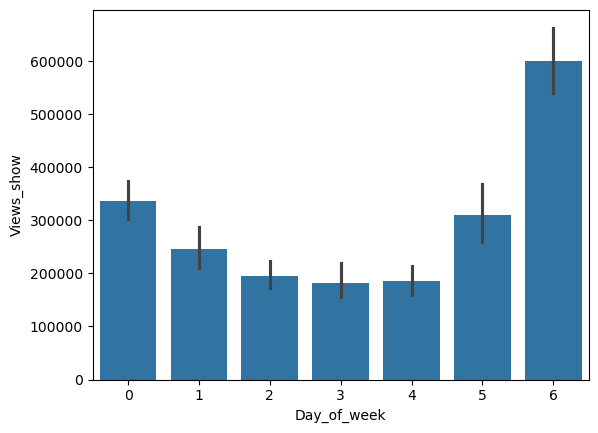

In [28]:
sns.barplot(data=media,x='Day_of_week',y='Views_show')

In [29]:
# sunday gets most viewed, on avg weekend have more view than weekdays

In [30]:
# weekday vs weekend
di = {5:1,6:1,0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['Day_of_week'].map(di)

In [31]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1


<Axes: xlabel='weekend', ylabel='Views_show'>

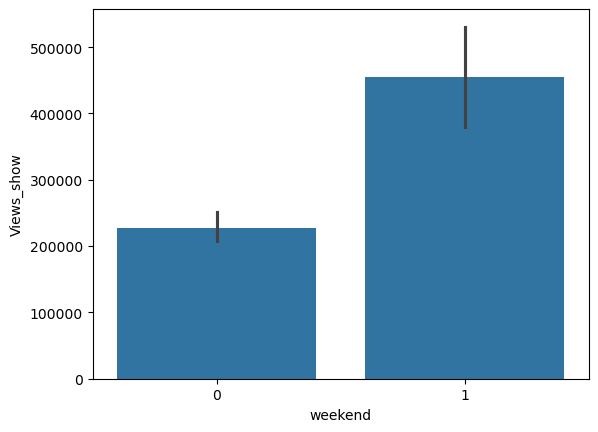

In [32]:
# weekend vs weekday views
sns.barplot(data=media,x='weekend',y='Views_show')

In [33]:
# viewership is higher on the weekend!

<Axes: xlabel='Ad_impression', ylabel='Views_show'>

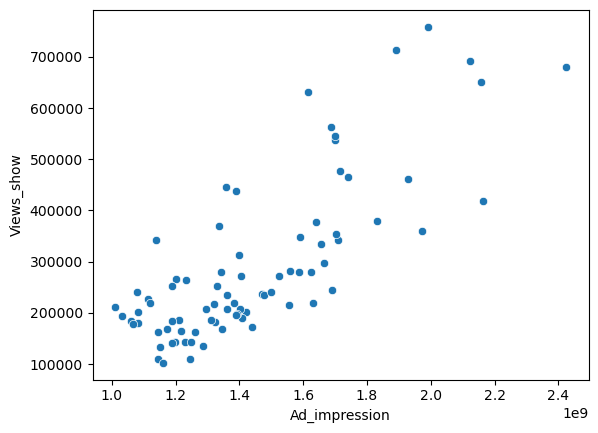

In [34]:
# 1) Ad impression, views_shows
sns.scatterplot(data=media,x='Ad_impression',y='Views_show')

<Axes: xlabel='Visitors', ylabel='Views_show'>

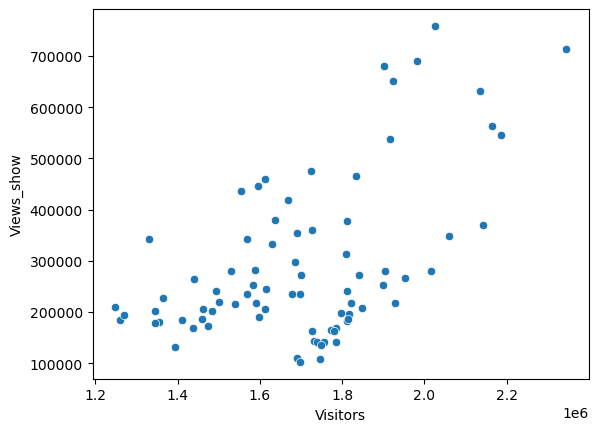

In [35]:
# 2) Visitors, views_shows
sns.scatterplot(data=media,x='Visitors',y='Views_show')

<Axes: xlabel='Views_platform', ylabel='Views_show'>

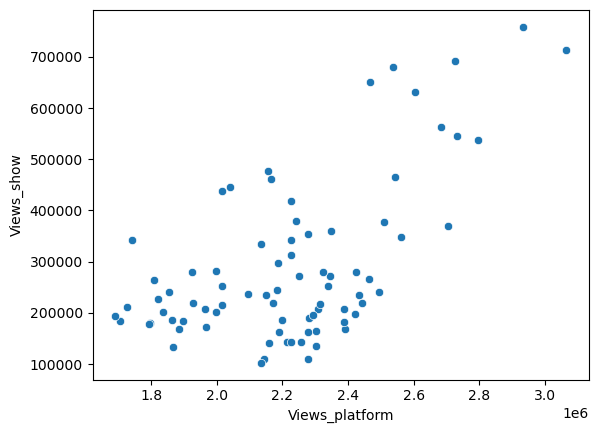

In [36]:
# 3) Views_platform, views_shows
sns.scatterplot(data=media,x='Views_platform',y='Views_show')

In [37]:
corr_media = media[['Views_show', 'Visitors', 'Views_platform', 'Ad_impression']].corr()
corr_media

,Views_show,Visitors,Views_platform,Ad_impression
Views_show,1.000000,0.535290,0.604279,0.785673
Visitors,0.535290,1.000000,0.935832,0.478598
Views_platform,0.604279,0.935832,1.000000,0.587003
Ad_impression,0.785673,0.478598,0.587003,1.000000


<Axes: >

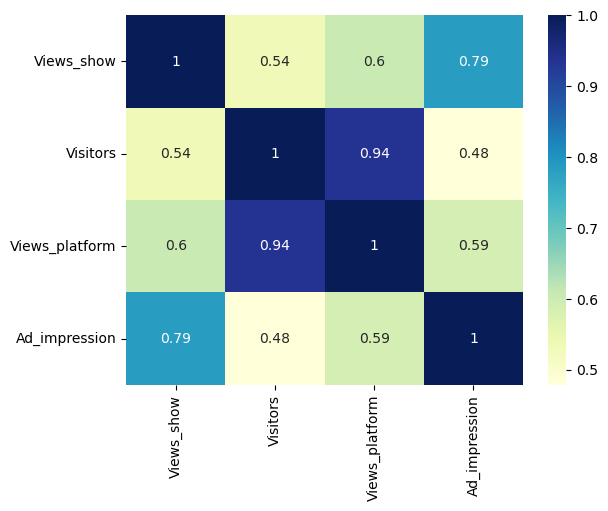

In [38]:
sns.heatmap(corr_media,annot=True,cmap="YlGnBu")

<Axes: xlabel='Cricket_match_india', ylabel='Views_show'>

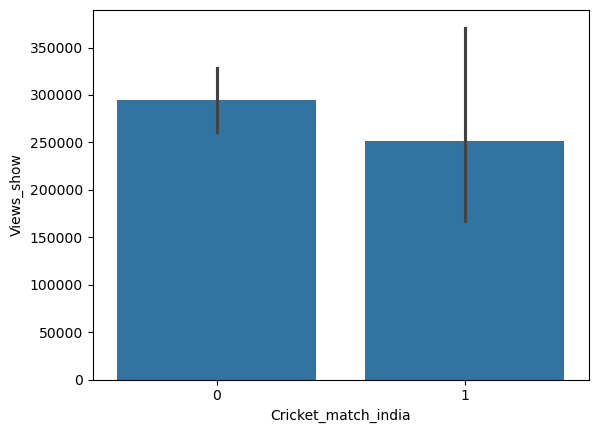

In [39]:
# 4) India Match,views_shows
sns.barplot(data=media,x='Cricket_match_india',y='Views_show')
# cricket match reduces the views of the show!

<Axes: xlabel='Character_A', ylabel='Views_show'>

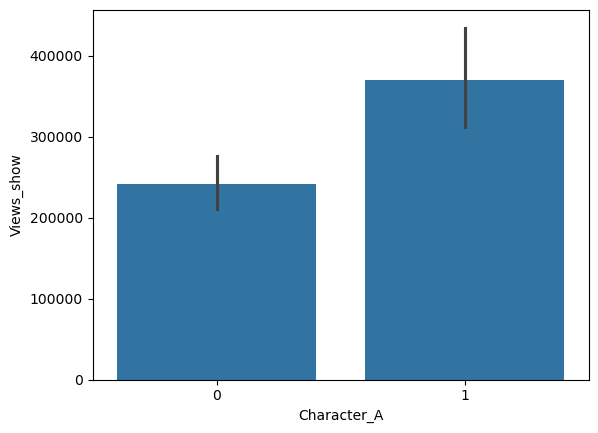

In [40]:
# 5) Character A,views_shows
sns.barplot(data=media,x='Character_A',y='Views_show')
# Character A increases the views!

# Machine Learning

In [42]:
# model 1

In [43]:
import statsmodels.api as sm

In [44]:
X = media[['Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_of_week', 'weekend']]
y = media['Views_show']
X = sm.add_constant(X)
lr_m2 = sm.OLS(y,X).fit()
print(lr_m2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     48.43
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           9.60e-25
Time:                        19:58:43   Log-Likelihood:                -999.39
No. Observations:                  80   AIC:                             2015.
Df Residuals:                      72   BIC:                             2034.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.475e+05   7

In [45]:
# sklearn Linear Regession!

In [46]:
# model 2

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
X = media[['Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day_of_week', 'weekend']]
y = media['Views_show']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                train_size = 0.7,random_state = 100)
# training data will be 70% of overall data (random)
# testing  data will be 30% of overall data (random)

In [55]:
lm_sk=LinearRegression()
lm_sk.fit(X_train,y_train)

LinearRegression()

In [57]:
y_pred = lm_sk.predict(X_test)
y_pred

array([574919.16680051, 645921.89986005, 228928.08082421, 137371.88608302,
       245527.0124731 , 371108.28232809, 185324.38116409, 249741.97245407,
       290854.35249147, 244620.59097392, 227780.03941663, 336334.84580935,
       330160.81099955, 365602.42930558, 235172.5113935 , 144589.33115177,
       224844.63006503, 211387.70027888, 153934.63215334, 419853.36370728,
       499294.71350754, 543773.56212064, 232277.41183403, 631952.72867047])

In [59]:
y_test

25    650563
46    758631
69    217791
5     342997
42    190287
11    437117
64    143112
23    206830
20    215077
62    196026
68    271341
59    266086
28    343223
26    460492
43    206740
6     227313
49    197201
63    162150
12    263638
74    631962
38    465382
45    537050
37    235508
39    691068
Name: Views_show, dtype: int64

In [63]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_test,y_pred)

0.7886031818848662

In [77]:
r2_score(y_test,y_pred)

0.7672075690216094